# Challenges

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_csv('2013_movies.csv')

In [3]:
y = df['DomesticTotalGross']

In [4]:
const = pd.Series([1]*len(y))

#### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [37]:
rgr = LinearRegression(fit_intercept=False)
rgr.fit(const.reshape(100, 1),y)
preds = rgr.predict(const.reshape(100, 1))

In [38]:
print rgr.coef_
print rgr.intercept_

[  1.00596875e+08]
0.0


The interpretation of this model is the same as any other linear model. The beta term on the features represents how the dependent variable changes as the feature in question changes. However the the only feature in this model is the constant term and it has no variation. Because it has no variation, the fitted linear model will necessarily be a flat line. So we can think of this problem as choosing the horizontal line that minimizes the squared residual. This can be accomplished by setting the line at the mean Y value. So the beta on the constant term is just the mean value of Y. This means that this model will just predict the mean value of Y for any X value you put in. 

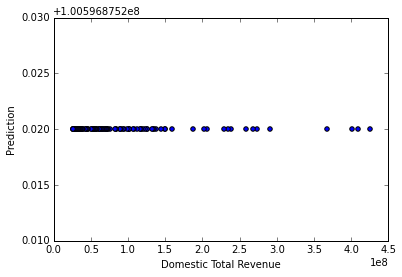

In [11]:
plt.scatter(y,preds)
plt.ylabel('Prediction')
plt.xlabel('Domestic Total Revenue')

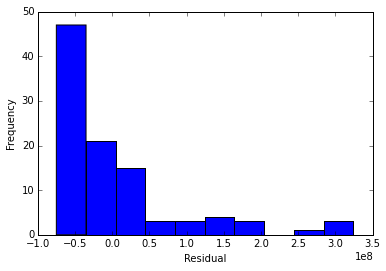

In [14]:
plt.hist(y-preds)
plt.ylabel('Frequency')
plt.xlabel('Residual')


#### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [40]:
rgr = LinearRegression()
rgr.fit(df.Budget.fillna(df.Budget.median()).reshape([100,1]),y)
preds = rgr.predict(df.Budget.fillna(df.Budget.median()).reshape([100,1]))
print rgr.coef_
print rgr.intercept_

[ 0.78879399]
43350151.5967


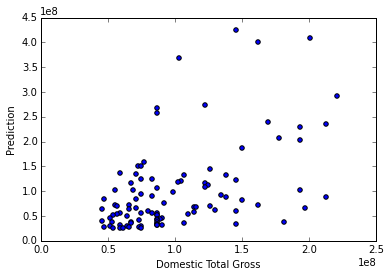

In [41]:
plt.scatter(preds,y)
plt.ylabel('Prediction')
plt.xlabel('Domestic Total Gross')

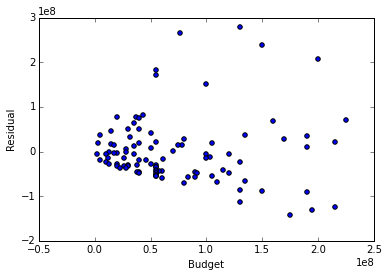

In [44]:
plt.scatter(df.Budget.fillna(df.Budget.median()),y-preds)
plt.ylabel('Residual')
plt.xlabel('Budget')

Adding this additional feature changes the model dramatically. Because this new feature has variation (in contrast to the constant term), the model can exploit the variation in X that corresponds to the variation in Y to make better predections on unseen data. 

#### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [47]:
rating_dummies = pd.get_dummies(df['Rating'])

In [49]:
rating_dummies['Budget'] = df.Budget.fillna(df.Budget.median())

In [50]:
X = rating_dummies

In [54]:
rgr = LinearRegression()
rgr.fit(X,y)
preds = rgr.predict(X)

In [58]:
print X.columns
print rgr.coef_

Index([u'G', u'PG', u'PG-13', u'R', u'Budget'], dtype='object')
[  1.34992741e+08  -3.24225268e+07  -5.00737838e+07  -5.24964305e+07
   7.72043310e-01]


With many features, the model gains greater flexibility in choosing the beta parameters. The coefficents on the dummy variables enable the model to essentially fit relevantly different populations in the data in one model.